<a href="https://colab.research.google.com/github/tomonari-masada/course2023-stats1/blob/main/04_random_numbers_in_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 乱数の生成
* scipyを使うと、いくつかの確率分布については、それに従う乱数を発生させることができる。
  * https://docs.scipy.org/doc/scipy/tutorial/stats.html#random-number-generation
  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

## 乱数の初期化

### random number generatorの作成
* scipyの乱数生成はNumPyのそれに依存している。
* よって、NumPyでのrandom number generator作成方法をそのまま使う。
 * https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator

In [2]:
rng = np.random.default_rng(seed=42)
rng

Generator(PCG64) at 0x794D7AEF19A0

### random number generatorの使い方
* NumPyの場合は、以下のようにしてrandom number generatorを使う。

* 例１: 一様分布

In [3]:
arr1 = rng.random((3, 3))
arr1

array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235],
       [0.7611397 , 0.78606431, 0.12811363]])

* 例2: ランダムな置換

In [4]:
x = np.arange(10)
rng.permuted(x)

array([7, 0, 4, 2, 3, 5, 1, 8, 6, 9])

## ベルヌーイ分布

* 二つのアイテム0と1があるとする。
* アイテム1の出現確率が0.3のベルヌーイ分布を考える。

* このベルヌーイ分布に従う乱数を1000個発生させる。

In [5]:
from scipy.stats import bernoulli
p = 0.3
r = bernoulli.rvs(p, size=1000, random_state=rng)

* 発生させた乱数の値の分布を描いてみる。
  * アイテム1の割合がほぼ0.3になっているはず。

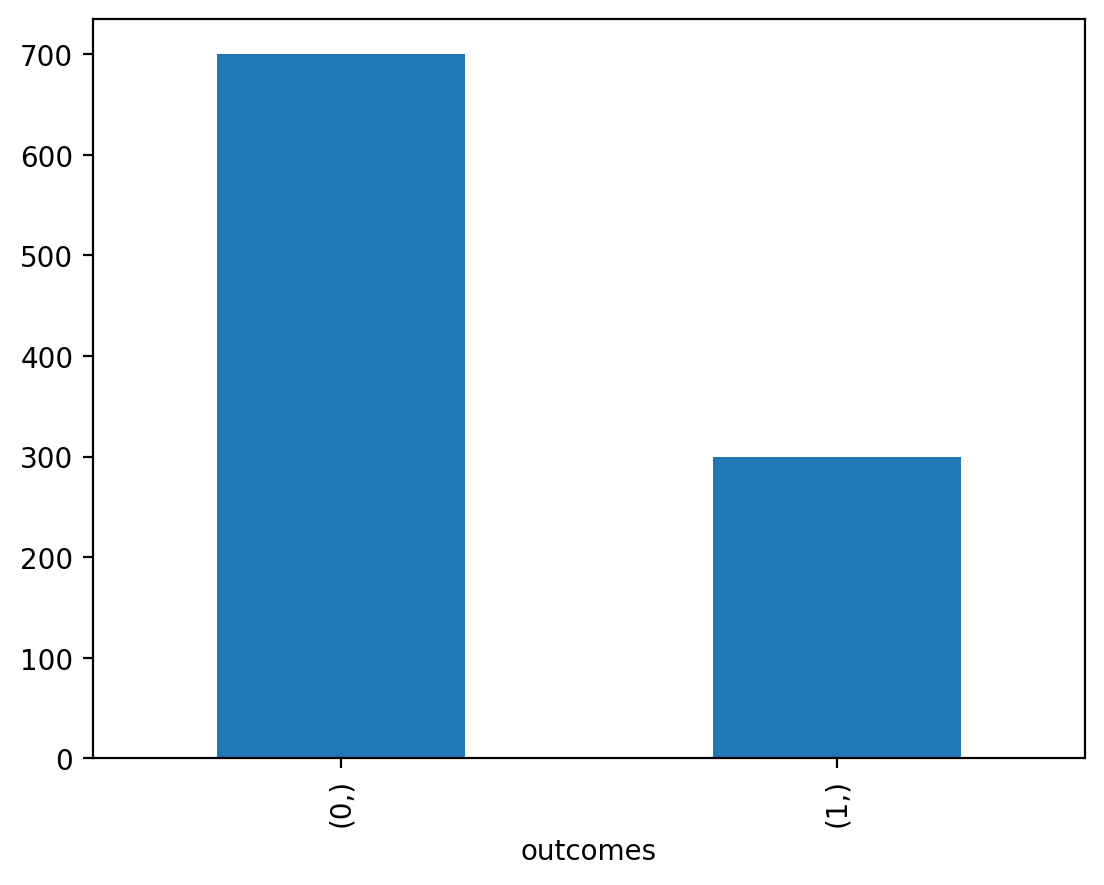

In [6]:
import pandas as pd
pd.DataFrame({"outcomes":r}).value_counts().plot.bar();

## 二項分布

* 試行回数が8でアイテム1の出現確率が0.4の二項分布を考える。

* 確率質量関数を描いてみる。

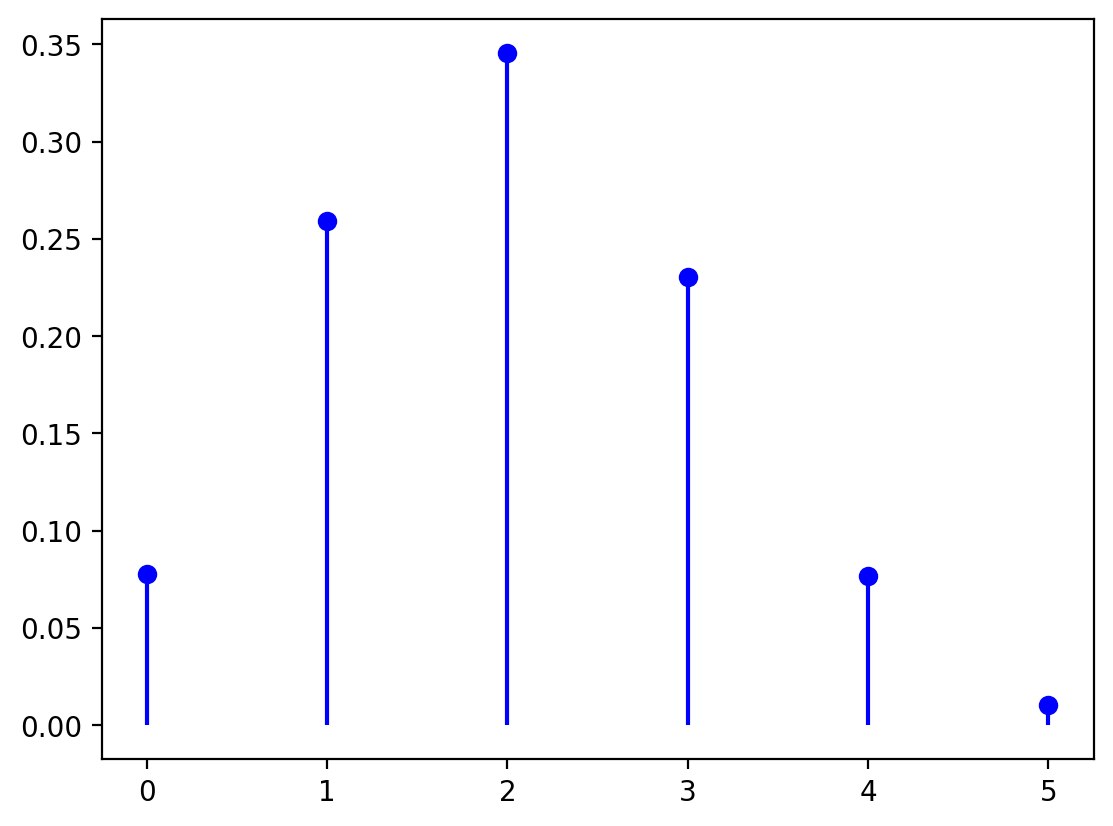

In [ ]:
from scipy.stats import binom

n, p = 8, 0.4
x = np.arange(n+1)
plt.plot(x, binom.pmf(x, n, p), 'bo')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b');

* 乱数を1000個発生させ、頻度分布を描いてみる。

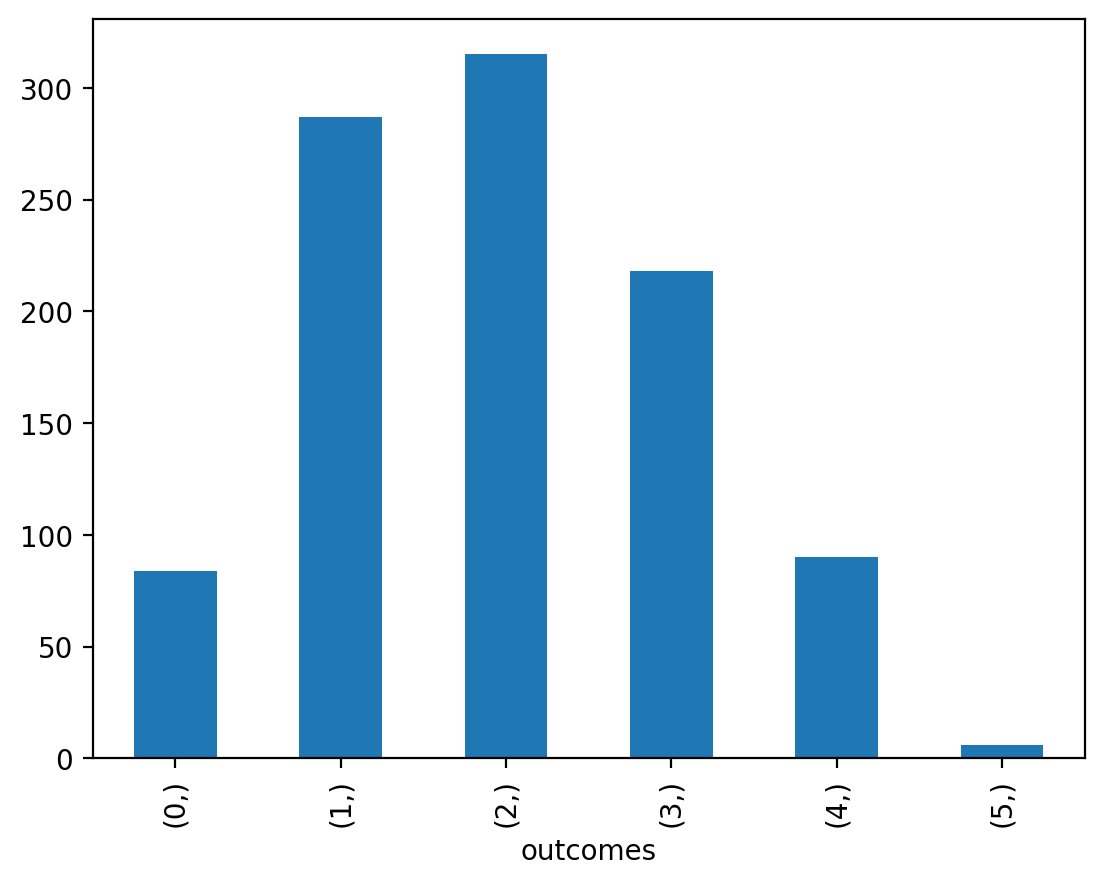

In [ ]:
r = binom.rvs(n, p, size=1000)
pd.DataFrame({"outcomes":r}).value_counts().sort_index().plot.bar();

## 単変量正規分布

* 標準正規分布の確率密度関数を描いてみる。

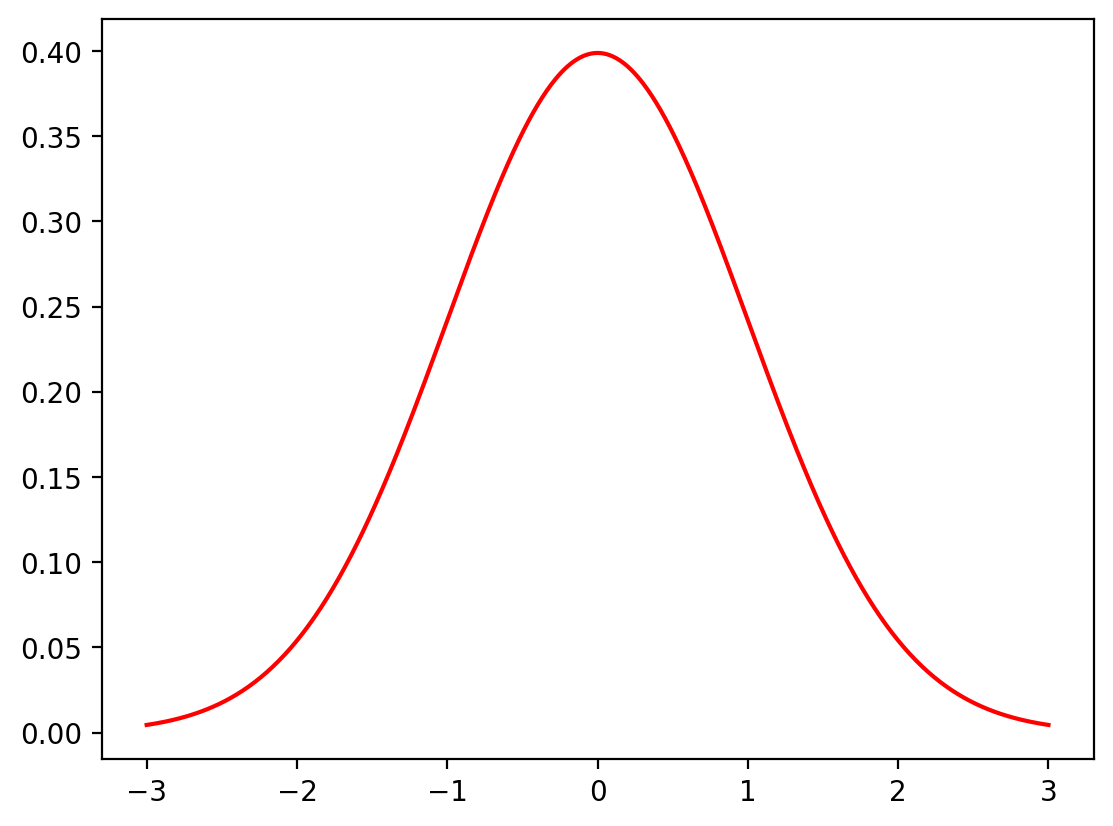

In [ ]:
from scipy.stats import norm

x = np.linspace(-3, 3, 601)
plt.plot(x, norm.pdf(x), 'r-');

* 正規乱数を1000個発生させて、相対頻度の分布を描いてみる。
  * `density=True`とする。
  * こうすると、ヒストグラムの下の面積が1になるように描いてくれる。
  * 詳しくは https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

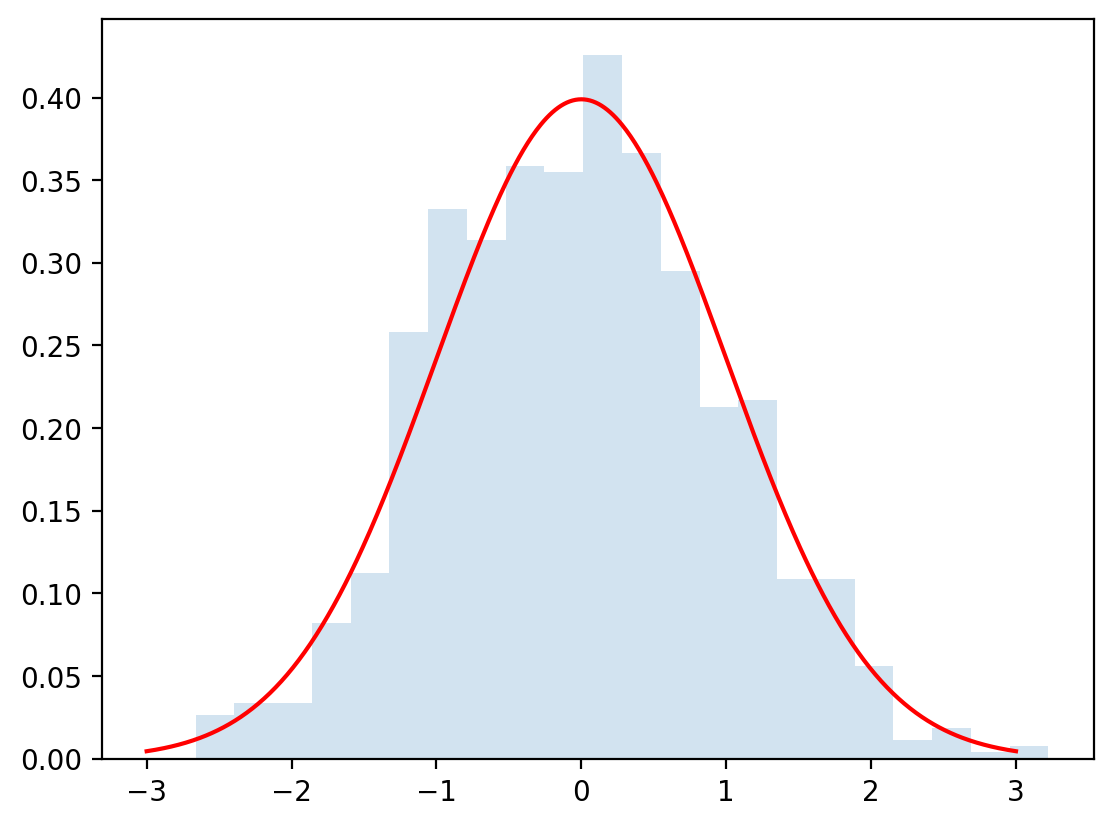

In [ ]:
r = norm.rvs(size=1000)
plt.plot(x, norm.pdf(x), 'r-') # 上と同じ
plt.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2);

* 問: 下の2つの値は、正規分布の、どういう値でしょうか？
  * ヒント: ppf = percent point function

In [ ]:
print(norm.ppf(0.01))
print(norm.ppf(0.99))

-2.3263478740408408
2.3263478740408408


* 標準正規分布でない正規分布の確率密度関数を描いてみる。

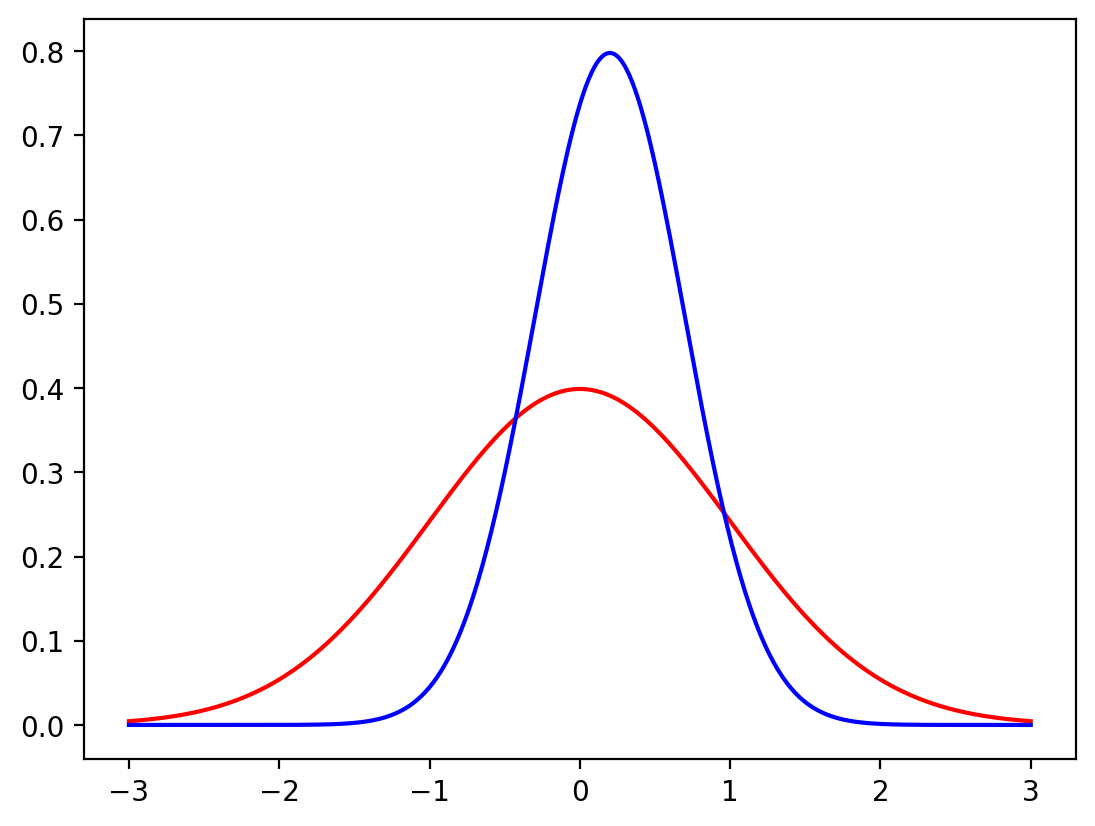

In [ ]:
plt.plot(x, norm.pdf(x), 'r-')

loc, scale = 0.2, 0.5
plt.plot(x, norm.pdf(x, loc=loc, scale=scale), 'b-');

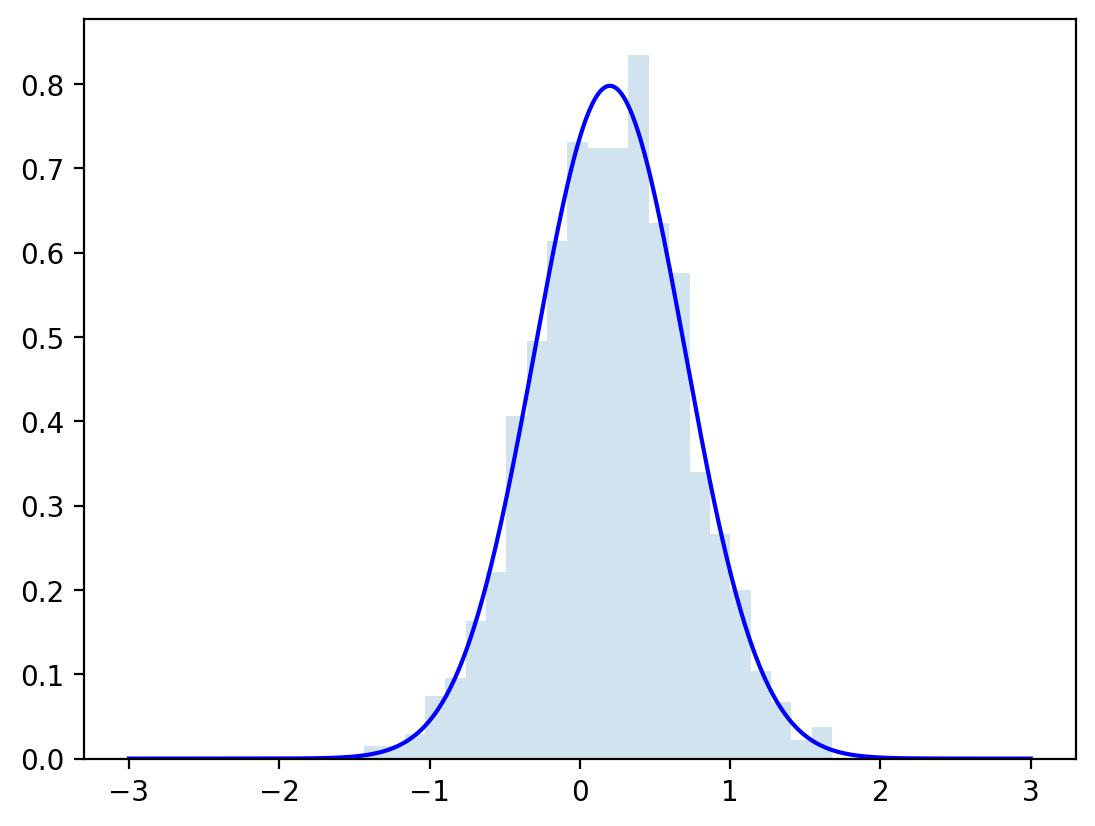

In [ ]:
r = norm.rvs(size=1000, loc=loc, scale=scale)
plt.plot(x, norm.pdf(x, loc=loc, scale=scale), 'b-')
plt.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2);

* 正規乱数から、任意の正規分布に従う乱数を、作ることができる。

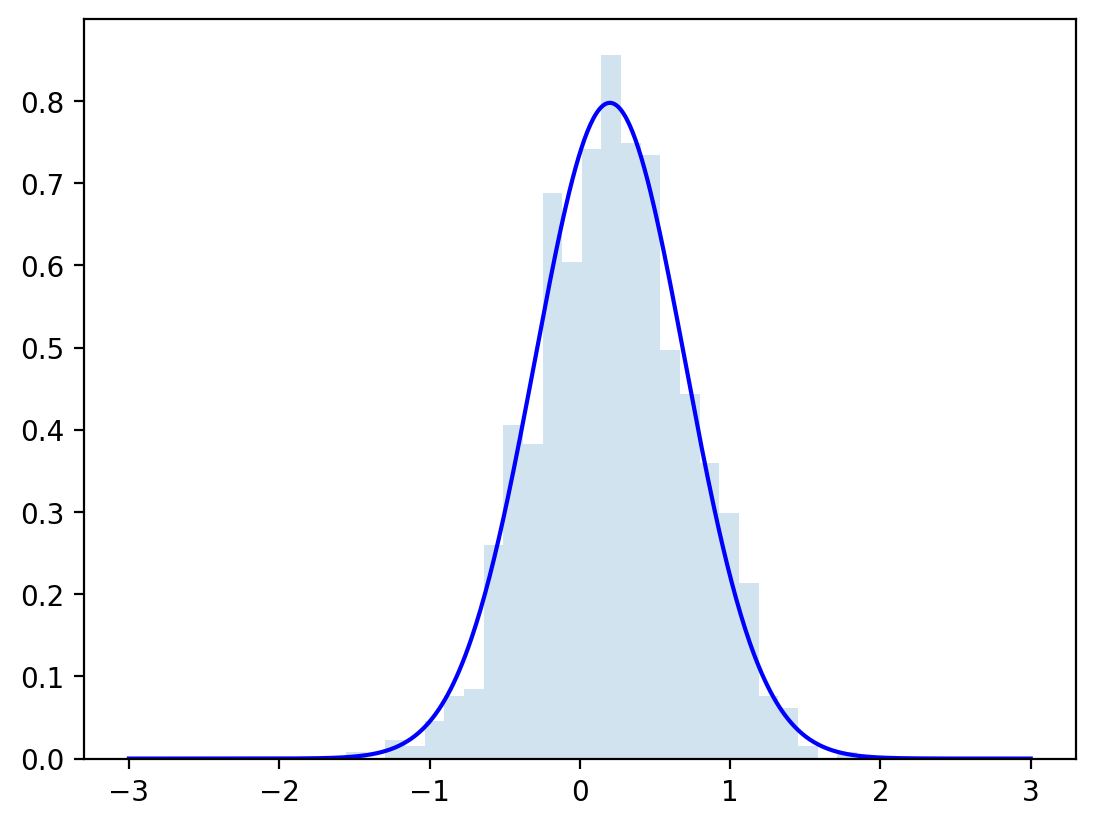

In [ ]:
r = norm.rvs(size=1000) * scale + loc
plt.plot(x, norm.pdf(x, loc=loc, scale=scale), 'b-')
plt.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2);

## 二変量正規分布

* 等高線図を描く準備

In [ ]:
x = np.linspace(-3, 3, 601)
y = np.linspace(-3, 3, 601)
X, Y = np.meshgrid(x, y)
pos = np.stack([X, Y], axis=2)

* 二変量正規分布の等高線図

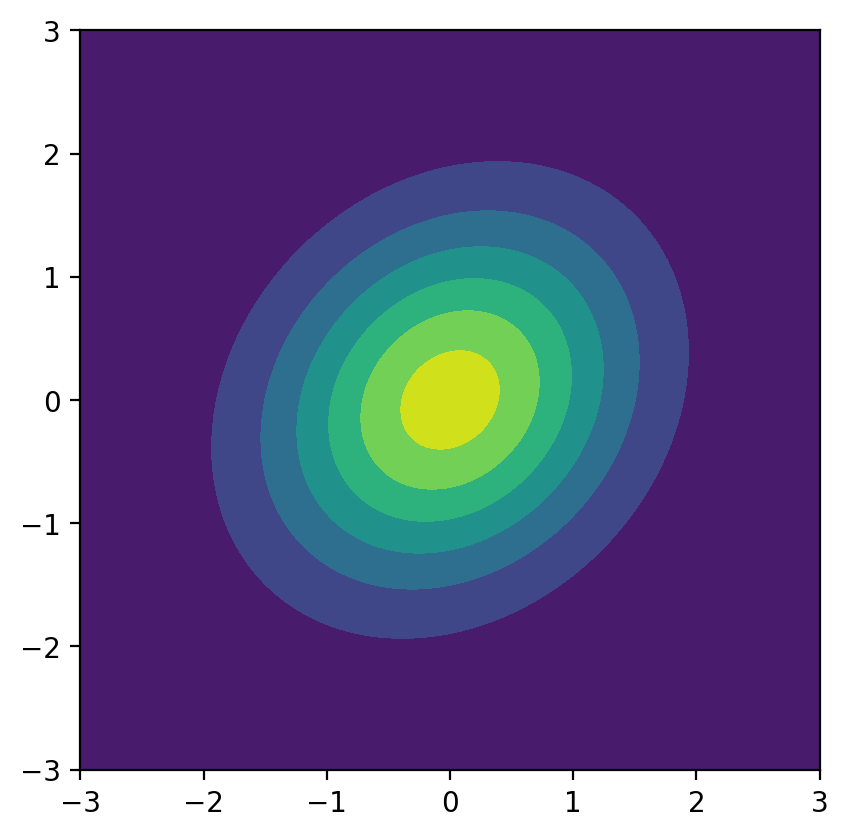

In [ ]:
from scipy.stats import multivariate_normal

cov = [[1, 0.2], [0.2, 1]]
ax = plt.subplot(1,1,1)
ax.contourf(X, Y, multivariate_normal.pdf(pos, cov=cov))
ax.set_aspect('equal');

* サンプルの散布図

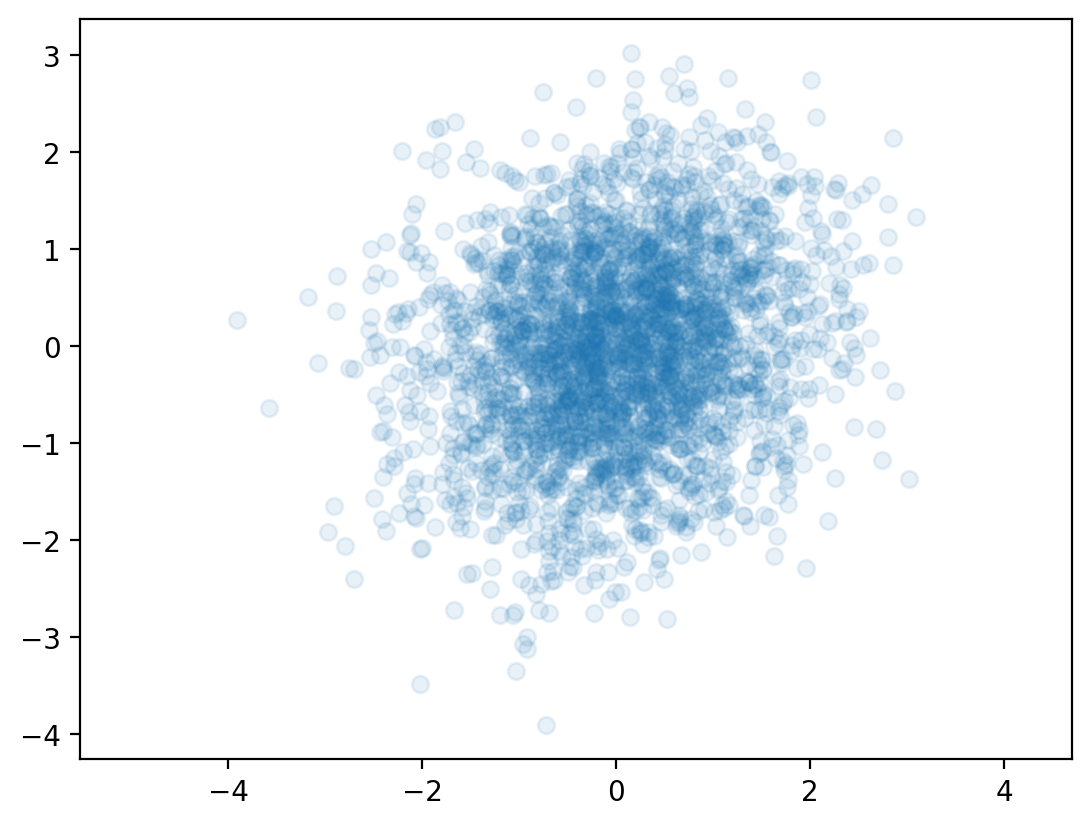

In [ ]:
r = multivariate_normal.rvs(size=3000, cov=cov)
ax = plt.subplot(1,1,1)
ax.plot(r[:,0], r[:,1], 'o', alpha=0.1)
ax.axis('equal');

# 本日の課題
* 適当に、二変量正規分布を設定する。
  * つまり、平均ベクトルと、共分散行列を設定する。
* まず、その二変量正規分布の確率密度関数の等高線を描く。
  * 上の例を参考にしてください。
* 次に、その二変量正規分布に従う乱数を1000個発生させる。
* そして、サンプルの散布図を描画する。
  * これも、上の例を参考にしてください。
* ただし、`np.random.randn()`だけを使うこと。
  * scipyの`multivariate_normal`は使わないこと。

* 例: 正規乱数を10個発生させる。

In [7]:
np.random.randn(10)

array([ 0.20509955, -1.05751216, -0.02882083,  0.71268029,  0.09980302,
       -0.56220642, -0.23171826, -1.06015257,  1.34796169,  1.39413205])